In [5]:
import sys
sys.path.append("..")
import Data as dt
import ChevalParesseux_lib as lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data  = dt.load_data(ticker="A")
data = data.loc['2012-01-01':'2017-01-01']

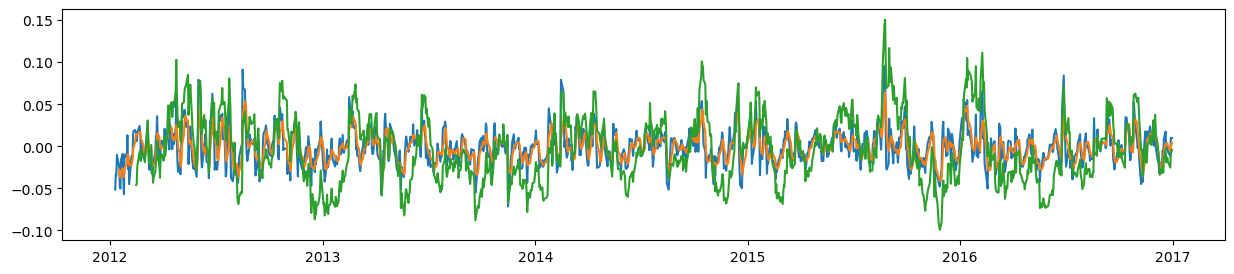

In [6]:
params = {
    "window": [5, 10, 30],
    "smoothing_method": [None, "ewma"],
    "window_smooth": [5, 10, 30],
    "lambda_smooth": [0.2, 0.5, 0.7],
}
average = lib.average_feature(data=data['close'], params=params, n_jobs=7)
average_df = average.fit(max_correlation=0.9)
average_df = average.extract()
plt.figure(figsize=(15, 3))
plt.plot(average_df)
plt.show()

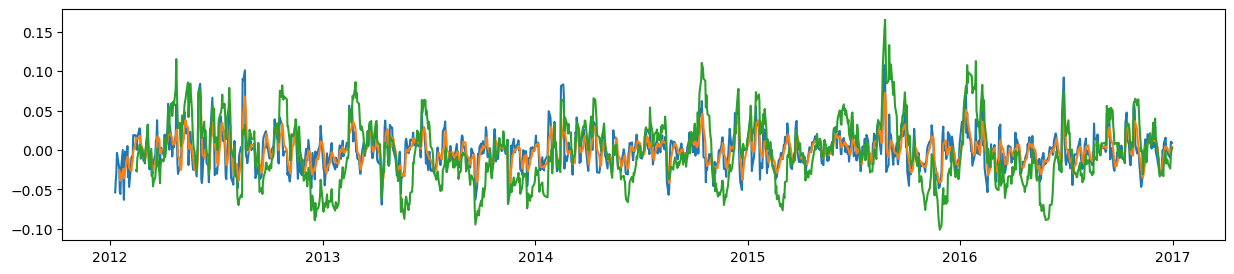

In [8]:
median = lib.median_feature(data=data['close'], params=params, n_jobs=7)
median_df = median.fit(max_correlation=0.9)
median_df = median.extract()
plt.figure(figsize=(15, 3))
plt.plot(median_df)
plt.show()

In [5]:
minimum = ft.minimum_feature(data=data['close'], name='minimum', params=params, n_jobs=7)
minimum_df = minimum.fit(max_correlation=0.9)
minimum_df = minimum.extract()

In [6]:
maximum = ft.maximum_feature(data=data['close'], name='maximum', params=params, n_jobs=7)
maximum_df = maximum.fit(max_correlation=0.9)
maximum_df = maximum.extract()

In [7]:
smoothedLike_df = pd.concat([average_df, median_df, minimum_df, maximum_df], axis=1)
smoothedLike_df = ft.correlation_filter(smoothedLike_df, max_correlation=0.9)

In [8]:
volatility = ft.volatility_feature(data=data['close'], name='volatility', params=params, n_jobs=7)
volatility_df = volatility.fit(max_correlation=0.9)
volatility_df = volatility.extract()

In [9]:
skewness = ft.skewness_feature(data=data['close'], name='skewness', params=params, n_jobs=7)
skewness_df = skewness.fit(max_correlation=0.9)
skewness_df = skewness.extract()

In [10]:
kurtosis = ft.kurtosis_feature(data=data['close'], name='kurtosis', params=params, n_jobs=7)
kurtosis_df = kurtosis.fit(max_correlation=0.9)
kurtosis_df = kurtosis.extract()

In [11]:
params['quantile'] = [0.1, 0.25, 0.5, 0.75, 0.9]
quantile = ft.quantile_feature(data=data['close'], name='quantile', params=params, n_jobs=7)
quantile_df = quantile.fit(max_correlation=0.9)
quantile_df = quantile.extract()

In [12]:
distribution_df = pd.concat([volatility_df, skewness_df, kurtosis_df, quantile_df], axis=1)
distribution_df = ft.correlation_filter(distribution_df, max_correlation=0.9)

In [13]:
del params['quantile']
momentum = ft.momentum_feature(data=data['close'], name='momentum', params=params, n_jobs=7)
momentum_df = momentum.fit(max_correlation=0.9)
momentum_df = momentum.extract()

In [14]:
Z_momentum = ft.Z_momentum_feature(data=data['close'], name='Z_momentum', params=params, n_jobs=7)
Z_momentum_df = Z_momentum.fit(max_correlation=0.9)
Z_momentum_df = Z_momentum.extract()

In [15]:
linear_tempReg = ft.linear_tempReg_feature(data=data['close'], name='linear_tempreg', params=params, n_jobs=7)
linear_tempReg_df = linear_tempReg.fit(max_correlation=0.9)
linear_tempReg_df = linear_tempReg.extract()

In [16]:
nonlinear_tempReg = ft.nonlinear_tempReg_feature(data=data['close'], name='nonlinear_tempreg', params=params, n_jobs=7)
nonlinear_tempReg_df = nonlinear_tempReg.fit(max_correlation=0.9)
nonlinear_tempReg_df = nonlinear_tempReg.extract()

In [17]:
drift_df = pd.concat([momentum_df, Z_momentum_df, linear_tempReg_df, nonlinear_tempReg_df], axis=1)
drift_df = ft.correlation_filter(drift_df, max_correlation=0.9)


In [18]:
entropy = ft.entropy_feature(data=data['close'], name='entropy', params=params, n_jobs=7)
entropy_df = entropy.fit(max_correlation=0.9)
entropy_df = entropy.extract()

In [19]:
full_df = pd.concat([smoothedLike_df, distribution_df, drift_df, entropy_df], axis=1)
full_df = ft.correlation_filter(full_df, max_correlation=0.9)

full_df.corr()

,average_5_None_5_0.2,average_5_ewma_5_0.2,average_30_None_5_0.2,min_10_None_5_0.2,min_30_None_5_0.2,max_10_None_5_0.2,vol_5_None_5_0.2,vol_5_ewma_5_0.2,vol_10_None_5_0.2,vol_10_ewma_5_0.2,...,kontoyiannis_entropy_30_ewma_5_0.5,shannon_entropy_30_ewma_5_0.7,lempel_ziv_entropy_30_ewma_5_0.7,kontoyiannis_entropy_30_ewma_5_0.7,shannon_entropy_30_ewma_10_0.2,lempel_ziv_entropy_30_ewma_10_0.2,kontoyiannis_entropy_30_ewma_10_0.2,lempel_ziv_entropy_30_ewma_10_0.5,lempel_ziv_entropy_30_ewma_30_0.2,kontoyiannis_entropy_30_ewma_30_0.2
average_5_None_5_0.2,1.000000,0.742211,0.603705,0.786450,0.552303,0.775961,0.015060,0.078335,-0.001620,0.010867,...,-0.012840,0.093185,0.044270,-0.033476,0.088142,0.021308,-0.011928,0.059759,0.057876,-0.014284
average_5_ewma_5_0.2,0.742211,1.000000,0.706392,0.787641,0.614534,0.799756,0.110768,0.162500,0.052565,0.096204,...,-0.008553,0.117907,0.063808,-0.043085,0.159274,0.077069,0.000135,0.066608,0.102909,0.007019
average_30_None_5_0.2,0.603705,0.706392,1.000000,0.646551,0.895014,0.792927,0.274072,0.290909,0.302976,0.277388,...,0.052634,0.172974,0.068462,-0.048696,0.399247,0.284155,0.072778,0.158118,0.338033,0.103757
min_10_None_5_0.2,0.786450,0.787641,0.646551,1.000000,0.648297,0.673357,-0.135436,-0.106552,-0.220481,-0.186448,...,-0.019388,0.121217,0.045773,-0.045373,0.126401,0.081314,-0.035728,0.072927,0.097715,-0.029017
min_30_None_5_0.2,0.552303,0.614534,0.895014,0.648297,1.000000,0.658595,0.162625,0.162071,0.157283,0.121010,...,0.124518,0.233168,0.073023,0.010722,0.480087,0.354179,0.200378,0.220212,0.419971,0.225719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lempel_ziv_entropy_30_ewma_10_0.2,0.021308,0.077069,0.284155,0.081314,0.354179,0.115126,0.127118,0.092396,0.183498,0.129883,...,0.024142,0.241210,0.075271,0.011381,0.656853,1.000000,0.250273,0.297923,0.751952,0.232152
kontoyiannis_entropy_30_ewma_10_0.2,-0.011928,0.000135,0.072778,-0.035728,0.200378,0.056487,0.112816,0.106292,0.127158,0.112295,...,0.466862,0.129944,0.054991,0.239261,0.276280,0.250273,1.000000,0.139819,0.278868,0.879189
lempel_ziv_entropy_30_ewma_10_0.5,0.059759,0.066608,0.158118,0.072927,0.220212,0.087327,0.041776,-0.000975,0.068303,0.033281,...,0.138026,0.445254,0.308037,0.082171,0.366973,0.297923,0.139819,1.000000,0.317473,0.149578
lempel_ziv_entropy_30_ewma_30_0.2,0.057876,0.102909,0.338033,0.097715,0.419971,0.163544,0.144295,0.137199,0.213299,0.180484,...,0.053468,0.241173,0.088334,-0.036962,0.718817,0.751952,0.278868,0.317473,1.000000,0.350979
